In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset
df = pd.read_csv("loan_dataset.csv")

In [3]:
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
# rows and columns
df.shape

(116058, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

In [6]:
df.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [7]:
# check number unique values in loan id
df['loan_id'].nunique()

116058

In [8]:
# drop loan id , since its an identifier
data1 = df.drop("loan_id", axis=1)

In [9]:
# check for any null values
data1.isna().sum()

source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [10]:
data1['origination_date'].unique()

array(['2012-03-01', '2012-01-01', '2012-02-01'], dtype=object)

In [11]:
# import datetime to convert object to datetime
from datetime import datetime

In [12]:
data1['origination_date']=data1['origination_date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

In [13]:
data1['origination_date'].unique()

array(['2012-03-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
# create new columns with year and month of orgination date
data1['org_year'] = data1['origination_date'].apply(lambda x:x.year)
data1['org_month'] = data1['origination_date'].apply(lambda x:x.month)

In [15]:
data1['first_payment_date'].unique()

array(['05/2012', '03/2012', '04/2012', '02/2012'], dtype=object)

In [16]:
# convert first payment date to datetime format
data1['first_payment_date']=data1['first_payment_date'].apply(lambda x: datetime.strptime(x,"%m/%Y"))

In [17]:
# create new columns with year and month of first payment date
data1['firstpay_year'] = data1['first_payment_date'].apply(lambda x:x.year)
data1['firstpay_month'] = data1['first_payment_date'].apply(lambda x:x.month)

In [18]:
data1.dtypes

source                              object
financial_institution               object
interest_rate                      float64
unpaid_principal_bal                 int64
loan_term                            int64
origination_date            datetime64[ns]
first_payment_date          datetime64[ns]
loan_to_value                        int64
number_of_borrowers                float64
debt_to_income_ratio               float64
borrower_credit_score              float64
loan_purpose                        object
insurance_percent                  float64
co-borrower_credit_score           float64
insurance_type                     float64
m1                                   int64
m2                                   int64
m3                                   int64
m4                                   int64
m5                                   int64
m6                                   int64
m7                                   int64
m8                                   int64
m9         

In [19]:
# drop the original columns and keep the new columns
data1.drop(['origination_date',"first_payment_date"], axis=1, inplace=True)

In [20]:
data1.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m8,m9,m10,m11,m12,m13,org_year,org_month,firstpay_year,firstpay_month
0,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,95,1.0,22.0,694.0,C86,...,0,0,0,0,0,1,2012,3,2012,5
1,Y,"Swanson, Newton and Miller",4.875,144000,360,72,1.0,44.0,697.0,B12,...,0,0,0,1,0,1,2012,1,2012,3
2,Z,Thornton-Davis,3.250,366000,180,49,1.0,33.0,780.0,B12,...,0,0,0,0,0,1,2012,1,2012,3
3,X,OTHER,4.750,135000,360,46,2.0,44.0,633.0,B12,...,0,1,1,1,1,1,2012,2,2012,4
4,X,OTHER,4.750,124000,360,80,1.0,43.0,681.0,C86,...,7,8,9,10,11,1,2012,2,2012,4


In [21]:
# encode source ,financial institution and loan purpose columns
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
data1['source'] = le.fit_transform(data1['source'])
data1['financial_institution'] = le.fit_transform(data1['financial_institution'])
data1['loan_purpose'] = le.fit_transform(data1['loan_purpose'])

In [23]:
# split target and features, 13th month(m13) loan payment is taken as target
X = data1.drop('m13', axis=1)
y = data1['m13']

In [24]:
data1['m13'].unique()

array([1, 0], dtype=int64)

In [25]:
# the summary statistics
data1.describe()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m8,m9,m10,m11,m12,m13,org_year,org_month,firstpay_year,firstpay_month
count,116058.000000,116058.000000,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.0,116058.000000,116058.0,116058.000000
mean,0.575971,6.517207,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,0.739363,...,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480,2012.0,1.703062,2012.0,3.709507
std,0.704715,4.450898,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,0.823953,...,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824,0.0,0.678898,0.0,0.688385
min,0.000000,0.000000,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.0,1.000000,2012.0,2.000000
25%,0.000000,1.000000,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.0,1.000000,2012.0,3.000000
50%,0.000000,8.000000,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.0,2.000000,2012.0,4.000000
75%,1.000000,8.000000,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.0,2.000000,2012.0,4.000000
max,2.000000,18.000000,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,2.000000,...,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000,2012.0,3.000000,2012.0,5.000000


In [26]:
# split the model into testing and training
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Logistic Regression model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(X_train,y_train)
log_pred = log_reg_model.predict(X_test)

C:\Users\JINCY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:
print("Confusion matrix is :\n", confusion_matrix(y_test,log_pred))

Confusion matrix is :
 [[23080     4]
 [  128     0]]


In [32]:
print("Accuracy score is:",accuracy_score(y_test, log_pred))

Accuracy score is: 0.9943132862312597


### SVM model

In [33]:
from sklearn.svm import SVC

In [34]:
svm = SVC(kernel="rbf")
svm_model = svm.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [35]:
print("Confusion matrix is :\n", confusion_matrix(y_test,svm_pred))

Confusion matrix is :
 [[23084     0]
 [  128     0]]


In [36]:
print("Accuracy score is:",accuracy_score(y_test, svm_pred))

Accuracy score is: 0.9944856108909185


### KNN model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
accuracy=[]
neighbors = range(3,15)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn_model = knn.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    accuracy.append(accuracy_score(y_test, knn_pred))

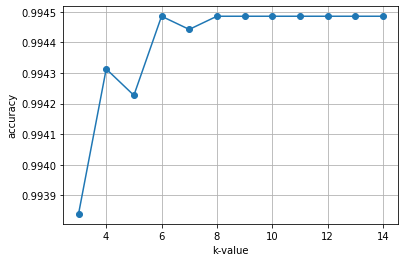

In [39]:
plt.plot(neighbors, accuracy,"o-")
plt.xlabel("k-value")
plt.ylabel("accuracy")
plt.grid()
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors=6)
knn_model1 = knn.fit(X_train, y_train)
knn_pred1 = knn_model1.predict(X_test)

In [41]:
print("Confusion matrix is :\n", confusion_matrix(y_test,knn_pred1))

Confusion matrix is :
 [[23084     0]
 [  128     0]]


In [42]:
print("Accuracy score is:",accuracy_score(y_test, knn_pred1))

Accuracy score is: 0.9944856108909185


### Decision Tree model

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

In [45]:
print("Confusion matrix is :\n", confusion_matrix(y_test,dt_pred))

Confusion matrix is :
 [[22973   111]
 [   82    46]]


In [46]:
print("Accuracy score is:",accuracy_score(y_test, dt_pred))

Accuracy score is: 0.9916853351714631


### Random Forest Algorithm model

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)

In [49]:
print("Confusion matrix is :\n", confusion_matrix(y_test,rfc_pred))

Confusion matrix is :
 [[23072    12]
 [   83    45]]


In [50]:
print("Accuracy score is:",accuracy_score(y_test, rfc_pred))

Accuracy score is: 0.9959072893331036


Random Forest Classification model gives the best accuracy(99.59%).

#### Scaling the data

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:

std_scale = StandardScaler()
X.iloc[:] = std_scale.fit_transform(X.iloc[:])


In [53]:
X.describe()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m7,m8,m9,m10,m11,m12,org_year,org_month,firstpay_year,firstpay_month
count,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,...,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,1.160580e+05,116058.0,1.160580e+05,116058.0,1.160580e+05
mean,-3.547548e-15,1.478315e-15,4.469170e-16,-5.671026e-17,3.339967e-16,-6.726426e-16,-1.571481e-16,-4.558249e-17,1.053441e-15,1.829718e-15,...,-1.289509e-14,-3.712566e-14,-2.005542e-14,-1.414341e-14,4.808151e-15,-4.810822e-14,0.0,1.783428e-16,0.0,-2.084179e-15
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.0,1.000004e+00,0.0,1.000004e+00
min,-8.173131e-01,-1.464252e+00,-3.511708e+00,-1.719727e+00,-2.587742e+00,-3.552695e+00,-1.207529e+00,-3.056524e+00,-1.824016e+01,-8.973400e-01,...,-4.122105e-02,-4.265242e-02,-4.179149e-02,-4.458259e-02,-4.364174e-02,-4.527618e-02,0.0,-1.035598e+00,0.0,-2.483371e+00
25%,-8.173131e-01,-1.239577e+00,-8.003173e-01,-7.692944e-01,-1.250874e+00,-6.032936e-01,-1.207529e+00,-7.956517e-01,-4.483900e-01,-8.973400e-01,...,-4.122105e-02,-4.265242e-02,-4.179149e-02,-4.458259e-02,-4.364174e-02,-4.527618e-02,0.0,-1.035598e+00,0.0,-1.030689e+00
50%,-8.173131e-01,3.331462e-01,1.309988e-02,-2.199617e-01,7.544282e-01,2.641773e-01,8.281373e-01,2.648380e-02,2.860240e-01,-8.973400e-01,...,-4.122105e-02,-4.265242e-02,-4.179149e-02,-4.458259e-02,-4.364174e-02,-4.527618e-02,0.0,4.373840e-01,0.0,4.219936e-01
75%,6.017056e-01,3.331462e-01,5.553780e-01,6.083971e-01,7.544282e-01,7.268285e-01,8.281373e-01,8.486193e-01,7.124579e-01,3.163262e-01,...,-4.122105e-02,-4.265242e-02,-4.179149e-02,-4.458259e-02,-4.364174e-02,-4.527618e-02,0.0,4.373840e-01,0.0,4.219936e-01
max,2.020724e+00,2.579894e+00,6.249298e+00,8.647837e+00,7.544282e-01,1.709962e+00,8.281373e-01,3.417793e+00,1.660089e+00,1.529992e+00,...,8.910225e+01,8.835297e+01,8.573409e+01,8.080176e+01,7.976805e+01,7.855011e+01,0.0,1.910366e+00,0.0,1.874676e+00


In [54]:
# split target and features
y = data1['m13']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Logistic Regression Model

In [56]:
log_reg = LogisticRegression()
log_reg_models = log_reg.fit(X_train,y_train)
log_preds = log_reg_models.predict(X_test)

In [57]:
print("Confusion matrix is :\n", confusion_matrix(y_test,log_preds))

Confusion matrix is :
 [[23081     3]
 [   88    40]]


In [58]:
print("Accuracy score is:",accuracy_score(y_test, log_preds))

Accuracy score is: 0.9960796139927623


#### KNN model

In [59]:
knn = KNeighborsClassifier(n_neighbors=6)
knn_models1 = knn.fit(X_train, y_train)
knn_preds1 = knn_models1.predict(X_test)

In [60]:
print("Confusion matrix is :\n", confusion_matrix(y_test,knn_preds1))

Confusion matrix is :
 [[23077     7]
 [   91    37]]


In [61]:
print("Accuracy score is:",accuracy_score(y_test, knn_preds1))

Accuracy score is: 0.9957780458383595


#### SVM model

In [62]:
svm = SVC(kernel="rbf")
svm_models = svm.fit(X_train, y_train)
svm_preds = svm_models.predict(X_test)

In [63]:
print("Confusion matrix is :\n", confusion_matrix(y_test,svm_preds))

Confusion matrix is :
 [[23080     4]
 [  115    13]]


In [64]:
print("Accuracy score is:",accuracy_score(y_test, svm_preds))

Accuracy score is: 0.9948733413751508


After scaling, accuracy improved for Logistic regression, KNN and SVM models. Overall Logistic Regression model on scaled data showed best accuracy (99.60%).